<a href="https://colab.research.google.com/github/dli10/college-rankings-forbes-2019/blob/main/PredictRankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From Harvard CS109 (Fall 2015)

## Prediction using Linear Regression (and Logistic Regression)

* Boston Housing Data Set
* Old Faithful Geyser Data Set



In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

# special matplotlib argument for improved plots
from matplotlib import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
import sys
#cwd = os.getcwd()
#print(cwd)

In [3]:
with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

In [4]:
forbesraw.keys()

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')

In [6]:
forbesraw.shape

(650, 17)

In [12]:
# Print column names
print(forbesraw.columns)

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')


In [13]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [14]:
forbesraw.describe()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'Undergraduate Population', 'Total Annual Cost' and 'Acceptance Rate'. 

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? 

Text(0.5, 1.0, 'Relationship between Undergraduate Population and Rank')

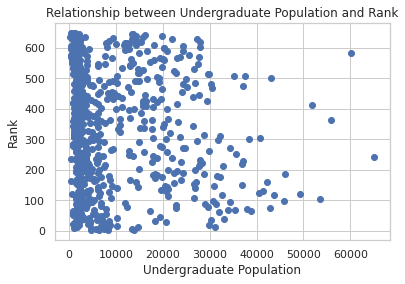

In [24]:
plt.scatter(forbesraw['Undergraduate Population'], forbesraw['Rank'])
plt.xlabel("Undergraduate Population")
plt.ylabel("Rank")
plt.title("Relationship between Undergraduate Population and Rank")

Text(0.5, 1.0, 'Relationship between Total Annual Cost and Rank')

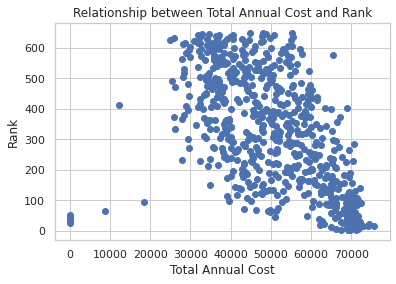

In [25]:
plt.scatter(forbesraw['Total Annual Cost'], forbesraw['Rank'])
plt.xlabel("Total Annual Cost")
plt.ylabel("Rank")
plt.title("Relationship between Total Annual Cost and Rank")

#sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

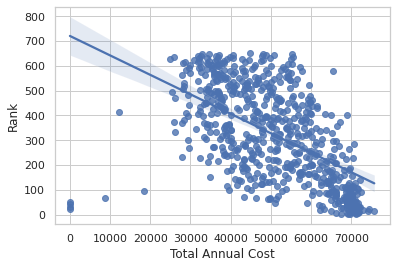

In [26]:
# We can also use seaborn regplot for this
# This provides automatic linear regression fits (useful for data exploration later on)
sns.regplot(y="Rank", x="Total Annual Cost", data=forbesraw, fit_reg = True)

Text(0.5, 1.0, 'Relationship between Acceptance Rate and Price')

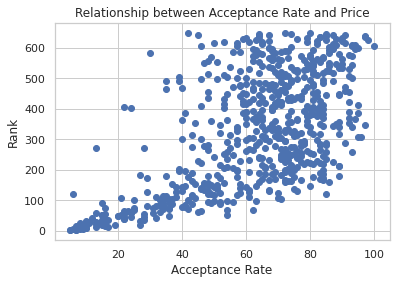

In [27]:
plt.scatter(forbesraw['Acceptance Rate'], forbesraw['Rank'])
plt.xlabel("Acceptance Rate")
plt.ylabel("Rank")
plt.title("Relationship between Acceptance Rate and Price")

### Histograms
***


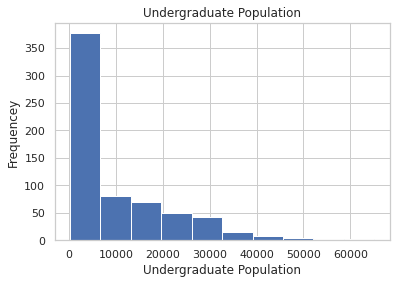

In [28]:
plt.hist(forbesraw['Undergraduate Population'])
plt.title("Undergraduate Population")
plt.xlabel("Undergraduate Population")
plt.ylabel("Frequencey")
plt.show()

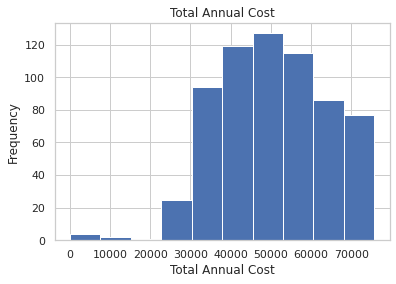

In [29]:
plt.hist(forbesraw['Total Annual Cost'])
plt.title('Total Annual Cost')
plt.xlabel('Total Annual Cost')
plt.ylabel('Frequency')
plt.show()

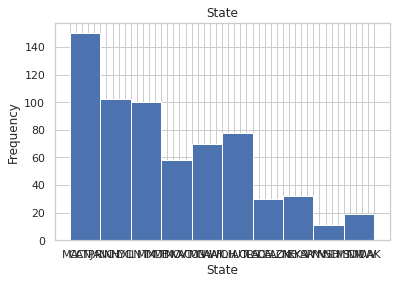

In [30]:
plt.hist(forbesraw['State'])
plt.title('State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

## Linear regression with Forbes 2019 college rankings
***

Here, 

$Y$ = college rankings

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict college rankings. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [31]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Rank ~ State',forbesraw).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.270
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.75e-06
Time:                        05:16:23   Log-Likelihood:                -4268.3
No. Observations:                 650   AIC:                             8639.
Df Residuals:                     599   BIC:                             8867.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     604.5000    126.726      4.770      

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. We can interpret the coefficient as, if we compare two groups of towns, one where the average number of rooms is say $5$ and the other group is the same except that they all have $6$ rooms. For these two groups the average difference in house prives is about $9.1$ (in thousands) so about $\$9,100$ difference. The confidence interval fives us a range of plausible values for this difference, about ($\$8,279, \$9,925$), deffinitely not chump change. 

In the last section of this Lab we discuss p-values in more detail. Please have a read though it and ask your TFs for more help.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

Text(0.5, 1.0, 'Ranks vs Predicted Ranks: $Y_i$ vs $\\hat{Y}_i$')

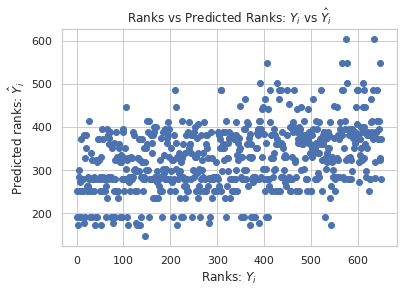

In [35]:
plt.scatter(forbesraw['Rank'], m.fittedvalues)
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks: $Y_i$ vs $\hat{Y}_i$")

### Fitting Linear Regression using `sklearn`


In [38]:
from sklearn.linear_model import LinearRegression
X = forbesraw.drop('Rank', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 

In [39]:
# Look inside linear regression object
# LinearRegression.<tab>
#lm.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [40]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [54]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [55]:
forbes_num = forbesraw
deletenames = ["Name", "City", "State", "Public/Private", "Website"] # create list of variables not of interest, columns to delete

for name in deletenames:
  forbes_num = forbes_num.drop(name,1)

forbes_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,1.0,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0
1,2.0,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0
2,3.0,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0
3,4.0,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0
4,5.0,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0


In [57]:
# Use all 13 predictors to fit linear regression model
forbes_num = forbes_num.dropna()
X = forbes_num.drop('Rank', axis = 1)

lm.fit(X, forbes_num['Rank'])

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term? 

LinearRegression()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [58]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 1766.0813581511093


In [59]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 11


In [60]:
zip(X.columns, lm.coef_)

In [61]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Undergraduate Population,-0.003801
1,Student Population,0.002003
2,Net Price,-0.000689
3,Average Grant Aid,0.003961
4,Total Annual Cost,-0.004384
5,Alumni Salary,-0.002624
6,Acceptance Rate,0.285396
7,SAT Lower,-0.194033
8,SAT Upper,-0.139200
9,ACT Lower,-12.400268


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [62]:
# first five predicted prices
lm.predict(X)[0:5]

array([ -49.47465295,  -27.32031178,  -39.86798504, -112.06308933,
        -11.89007147])

Text(0, 0.5, 'Frequency')

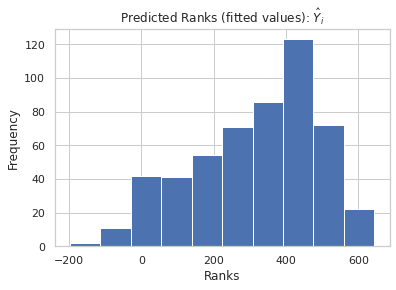

In [64]:
plt.hist(lm.predict(X))
plt.title('Predicted Ranks (fitted values): $\hat{Y}_i$')
plt.xlabel('Ranks')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly befor but this is how you access the predicted values in using `sklearn`.

Text(0.5, 1.0, 'Ranks vs Predicted Ranks: $Y_i$ vs $\\hat{Y}_i$')

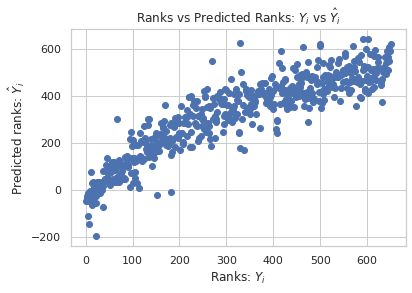

In [65]:
plt.scatter(forbes_num['Rank'], lm.predict(X))
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks: $Y_i$ vs $\hat{Y}_i$")

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [66]:
print(np.sum((forbes_num['Rank'] - lm.predict(X)) ** 2))

3588492.5999069065


#### Mean squared error

In [67]:
mseFull = np.mean((forbes_num['Rank'] - lm.predict(X)) ** 2)
print(mseFull)

6848.268320433029


## Relationship between `PTRATIO` and housing price
***

Try fitting a linear regression model using only the 'Total Annual Cost'

Calculate the mean squared error. 


In [69]:
lm = LinearRegression()
lm.fit(X[['Total Annual Cost']], forbes_num['Rank'])

LinearRegression()

In [70]:
msePTRATIO = np.mean((forbes_num['Rank'] - lm.predict(X[['Total Annual Cost']])) ** 2)
print(msePTRATIO)

20711.327487755345


We can also plot the fitted linear regression line. 

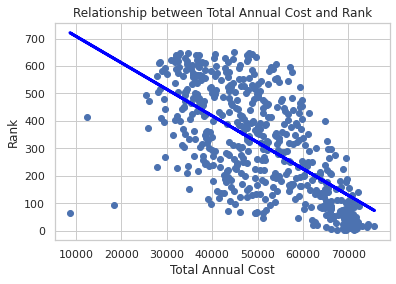

In [71]:
plt.scatter(forbes_num['Total Annual Cost'], forbes_num['Rank'])
plt.xlabel("Total Annual Cost")
plt.ylabel("Rank")
plt.title("Relationship between Total Annual Cost and Rank")

plt.plot(forbes_num['Total Annual Cost'], lm.predict(X[['Total Annual Cost']]), color='blue', linewidth=3)
plt.show()


## Other important things to think about when fitting a linear regression model
***
<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. </li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X.  
        <ul>
            <li>e.g. PTRATIO
        </ul>
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. 
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>


# Part 3: Training and Test Data sets

### Purpose of splitting data into Training/testing sets
***
<div class="span5 alert alert-info">

<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

In [72]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = forbes_num['Rank'][:-50]
Y_test = forbes_num['Rank'][-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(474, 11)
(50, 11)
(474,)
(50,)


Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. 

In [73]:
# let's look at the function in the help file
sklearn.model_selection.train_test_split?

In [74]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, forbes_num['Rank'], test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(351, 11)
(173, 11)
(351,)
(173,)


Your turn.  Let's build a linear regression model using our new training data sets. 

In [75]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model. 

In [76]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 6613.488987879483
Fit a model X_train, and calculate MSE with X_test, Y_test: 7600.909294395823


#### Residual plots

Text(0, 0.5, 'Residuals')

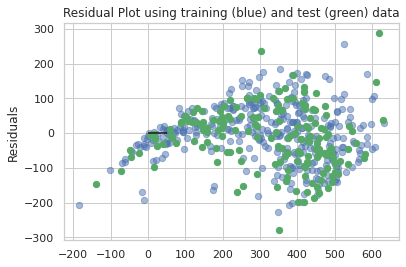

In [77]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### K-fold Cross-validation as an extension of this idea
***
<div class="span5 alert alert-info">

<p> A simple extension of the Test/train split is called K-fold cross-validation.  </p>

<p> Here's the procedure:</p>
<ul>
  <li> randomly assign your $n$ samples to one of $K$ groups. They'll each have about $n/k$ samples</li>
  <li> For each group $k$: </li>
    <ul>
      <li> Fit the model (e.g. run regression) on all data excluding the $k^{th}$ group</li>
      <li> Use the model to predict the outcomes in group $k$</li>
      <li> Calculate your prediction error for each observation in $k^{th}$ group (e.g. $(Y_i - \hat{Y}_i)^2$ for regression, $\mathbb{1}(Y_i = \hat{Y}_i)$ for logistic regression). </li>
    </ul>
  <li> Calculate the average prediction error across all samples $Err_{CV} = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$ </li>
</ul>
</div>

***

Luckily you don't have to do this entire process all by hand (``for`` loops, etc.) every single time, ``sci-kit learn`` has a very nice implementation of this, have a look at the [documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

## Another Example: Old Faithful Geyser Data Set
***

The [Old Faithful Geyser](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html) data set is a well-known data set that depicts the relationship of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA [[webcam]](http://yellowstone.net/webcams/). This data set is found in the base installation of the [R programming language](http://cran.r-project.org).  

`faithful` is a data set with 272 observations on 2 variables.

Column name| Description 
--- | --- 
eruptions | Eruption time (in mins)
waiting	| Waiting time to next eruption (in mins)

There is a function in `statsmodels` (or `sm` for short) called `sm.datasets.get_rdataset` which will download and return a data set found in [R](http://cran.r-project.org).  

Let's import the `faithful` dataset. 

In [ ]:
faithful = sm.datasets.get_rdataset("faithful")

In [ ]:
# Let's look at the help file
sm.datasets.get_rdataset?
faithful?

In [ ]:
faithful.title

'Old Faithful Geyser Data'

In [ ]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
faithful.shape

(272, 2)

### Histogram 
***

Create a histogram of the time between eruptions. What do you see? 

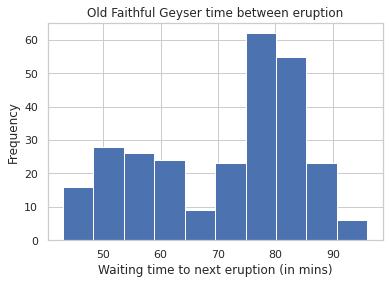

In [ ]:
plt.hist(faithful.waiting)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

This histogram indicates [Old Faithful isn’t as “faithful” as you might think](http://people.stern.nyu.edu/jsimonof/classes/2301/pdf/geystime.pdf). 

### Scatter plot 
***

Create a scatter plot of the `waiting` on the x-axis and the `eruptions` on the y-axis. 

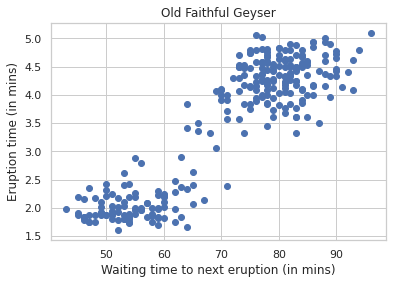

In [ ]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

### Build a linear regression to predict eruption time using `statsmodels`
***

Now let's build a linear regression model for the `faithful` DataFrame, and estimate the next eruption duration if the waiting time since the last eruption has been 75 minutes.

$$ Eruptions = \beta_0 + \beta_1 * Waiting + \epsilon $$ 

In [ ]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [ ]:
# Let's look at the options in model
# model.<tab>

In [ ]:
results = model.fit()

In [ ]:
# Let's look at the options in results
# results.<tab>

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              eruptions   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Mon, 09 May 2022   Prob (F-statistic):                   9.97e-214
Time:                        17:49:22   Log-Likelihood:                         -250.30
No. Observations:                 272   AIC:                                      502.6
Df Residuals:                     271   BIC:                                      506.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
results.params.values

array([0.05012919])

We notice, there is no intercept ($\beta_0$) fit in this linear model.  To add it, we can use the function `sm.add_constant`.  

In [ ]:
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85


Now let's fit a linear regression model with an intercept. 

In [ ]:
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print(resultsW0.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.13e-100
Time:                        17:49:22   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

If you want to predict the time to the next eruption using a waiting time of 75, you can directly estimate this using the equation 

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * 75 $$ 

or you can use `results.predict`.  

In [ ]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.7980801099789647

In [ ]:
resultsW0.predict(newX)

array([3.79808011])

Based on this linear regression, if the waiting time since the last eruption has been 75 minutes, we expect the next one to last approximately 3.80 minutes.

### Plot the regression line 
***

Instead of using `resultsW0.predict(X)`, we can use `resultsW0.fittedvalues` which are the $\hat{y}$. 

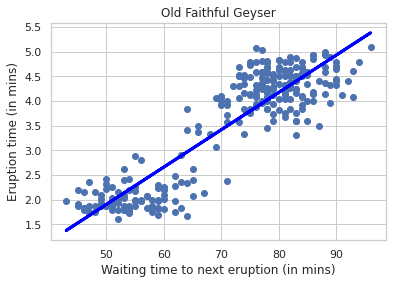

In [ ]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()

### Residuals, residual sum of squares, mean squared error
***

Recall, we can directly calculate the residuals as 

$$r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$$

To calculate the residual sum of squares, 

$$ S = \sum_{i=1}^n r_i = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $$

where $n$ is the number of observations.  Alternatively, we can simply ask for the residuals using `resultsW0.predict`

In [ ]:
resids = faithful.eruptions - resultsW0.predict(X)

In [ ]:
resids = resultsW0.resid

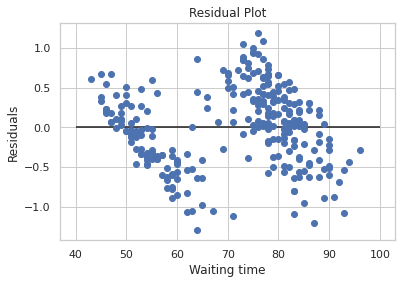

In [ ]:
plt.plot(faithful.waiting, resids, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual sum of squares: 

In [ ]:
print(np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2))

66.56177571269987


Mean squared error: 

In [ ]:
print(np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2))

0.24471241070845534


## Build a linear regression to predict eruption time using least squares 
***

Now let's build a linear regression model for the `faithful` DataFrame, but instead of using `statmodels` (or `sklearn`), let's use the least squares estimates of the coefficients for the linear regression model.

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$ 

The `numpy` function [`np.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot) is the dot product (or inner product) of two vectors (or arrays in python).  

The `numpy` function [`np.linalg.inv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) can be used to compute the inverse of a matrix. 

In [ ]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


First, compute $X^{\top}X$


In [ ]:
np.dot(X.T, X)

array([[2.720000e+02, 1.928400e+04],
       [1.928400e+04, 1.417266e+06]])

Next, compute the inverse of $X^{\top}X$ or $(X^{\top}X)^{-1}$. 

In [ ]:
np.linalg.inv(np.dot(X.T, X))

array([[ 1.04029479e-01, -1.41547492e-03],
       [-1.41547492e-03,  1.99652136e-05]])

Finally, compute $\hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $

In [ ]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print("Directly estimating beta:", beta)
print("Estimating beta using statmodels: ", resultsW0.params.values)

Directly estimating beta: [-1.87401599  0.07562795]
Estimating beta using statmodels:  [-1.87401599  0.07562795]


# Part 4: Many different types of regression
***
<div class="span5 alert alert-info">

<p>You do not always have a continuous $y$ variable that you are measuring. Sometimes it may be binary (e.g. 0 or 1). Sometimes it may be count data.  What do you do?</p>

<p>Use other types of regression besides just simple linear regression.</p>  

</div>


# Part 5: Logistic Regression
***


<div class="span5 alert alert-info">
<p>Logistic regression is a probabilistic model that links observed binary data to a set of features.</p>

<p>Suppose that we have a set of binary (that is, taking the values 0 or 1) observations $Y_1,\cdots,Y_n$, and for each observation $Y_i$ we have a vector of features $X_i$. The logistic regression model assumes that there is some set of **weights**, **coefficients**, or **parameters** $\beta$, one for each feature, so that the data were generated by flipping a weighted coin whose probability of giving a 1 is given by the following equation:

$$
P(Y_i = 1) = \mathrm{logistic}(\sum \beta_i X_i),
$$

where

$$
\mathrm{logistic}(x) = \frac{e^x}{1+e^x}.
$$
</p>
<p>When we *fit* a logistic regression model, we determine values for each $\beta$ that allows the model to best fit the *training data* we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.</p>

</div>

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

In [ ]:
from IPython.display import Image as Im
from IPython.display import display
Im('shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures.

In [ ]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data

FileNotFoundError: ignored

Lets plot this data

In [ ]:
# fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

# statsmodels works nicely with pandas dataframes
dat = pd.DataFrame(data, columns = ['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature',dat).fit()
print(logit_model.summary())

#### Interpreting p-values:
Generally we'd like the p-values to be very small as they represent the probability that we observed such an strong relationship between temperature and O-ring failures purely by chance. So when the p-value is small (we usually consider "small" as less than 0.05), what we're saying is that based on the data we observed, we know **fairly certainly** that temperature is strongly associated with the failure of O-rings. This is a very powerful statement that can take us a long way in terms of learning if used properly. Have a look at the Wikipedia page on [p-values](https://en.wikipedia.org/wiki/P-value) for a quick reminder.

There are some issues with testing many many hypotheses that we'll also encounter in the homework. But generally, the idea is that the data may (or may not) have information about things you're interested in. We ask the data questions through hypotheses, but the more questions we ask of it, the higher chances we have of the data actually showing associations at random. Have alook at [this article](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) to get an idea of the problem and some solutions. We'll be considering a very crude solution known as the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) but that is by no means the best solution. 

In [ ]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(50, 85, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))

Let's plot the data along with a range of predicted failure probabilities for unobserved temperatures.

In [ ]:
# plot data
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)


We can interpret the output from a logistic regression by looking at the coefficient of temperature (as well as the p-value). Since the coefficient of temperature is negative, we can say that an increase in temperature is associated with a decrease in the odds of having an O-ring failure. 